# Chapter 5, Exercise 2


a) Each observation has an equal probability of being selected.

The probability of selecting any one observation in one trial is
$\frac{1}{n}$.

The probability that the j-th observation is not selected on a given draw is the complement of that:

$P($not 𝑗-th observation$) = 1 − \frac{1}{n}$

So the probability that the frst bootstrap observation is
not the jth observation from the original sample is $1 − \frac{1}{n}$


b) In a bootstrap sample, each observation is selected with replacement from the original dataset of size
n, meaning that each selection is independent.

The probability that ANY particular observation, such as the
j-th observation, is not selected in one trial is:

$P($not 𝑗-th observation$) = 1 − \frac{1}{n}$

Conclusion:
The probability that the second bootstrap observation is not the
j-th observation is the same as for the first bootstrap observation, which is:
$1 − \frac{1}{n}$

c) Each draw from the original sample has a probability of not selecting the j-th observation as:

$P($not 𝑗-th observation$) = 1 − \frac{1}{n}$

The probability that the j-th observation is not selected in any of the
n draws is the product of the individual probabilities across all draws. Since the draws are independent, this probability is:
$(1 − \frac{1}{n})^n$

d) We showd in the previous question that the probability the j-th observation is not in the bootstrap sample is:

$P(j$ not in sample$) = (1 − \frac{1}{n})^n$

We can take the complement to find the probability that the j-th observation is in the bootstrap sample:

$P(j$ in sample$) = 1 - (1 − \frac{1}{n})^n$

For n = 5:
The probability that the j-th observation is in the bootstrap sample is:

$P(j$ in sample$) = 1 - (1 − \frac{1}{5})^5 = 1 - (\frac{4}{5})^5 = 0.67232$

e)
For n = 100:
The probability that the j-th observation is in the bootstrap sample is:

$P(j$ in sample$) = 1 - (1 − \frac{1}{100})^{100} = 1 - (\frac{99}{100})^{100} = 0.63397$

f)
For n = 10000:
The probability that the j-th observation is in the bootstrap sample is:

$P(j$ in sample$) = 1 - (1 − \frac{1}{10000})^{10000} = 1 - (\frac{9999}{10000})^{10000} = 0.63214$

***) For $n→∞$:
The probability that the j-th observation is in the bootstrap sample is:

$P(j$ in sample$) = \displaystyle \lim_{n \to \infty}(1 - (1 − \frac{1}{n})^{n})$.

To calculate this we can use the exponential limit:

$\displaystyle \lim_{n \to \infty}(1 + \frac{x}{n})^{n} = e^x$

For $x = -1 → \displaystyle \lim_{n \to \infty}(1 − \frac{1}{n})^{n} = \frac{1}{e}$

Thus we have:

$P(j$ in sample$) =
\displaystyle \lim_{n \to \infty}(1 - (1 - \frac{1}{n})^{n}) =
1 - \lim_{n \to \infty}(1 − \frac{1}{n})^{n} = 1-\frac{1}{e} ⇒$


$P(j$ in sample$) = 0.63212$

# Chapter 8, Exercise 8

a)

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

df = pd.read_csv('Carseats.csv');

X = df.drop('Sales', axis=1)
X['Urban'] = df['Urban'].map({'Yes':np.int16(1), 'No':np.int16(0)})
X['US'] = df['US'].map({'Yes':np.int16(1), 'No':np.int16(0)})
X['ShelveLoc'] = df['ShelveLoc'].map({'Bad':np.int16(0), 'Medium':np.int16(1), 'Good':np.int16(2)})

y = df['Sales']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=9)

b)

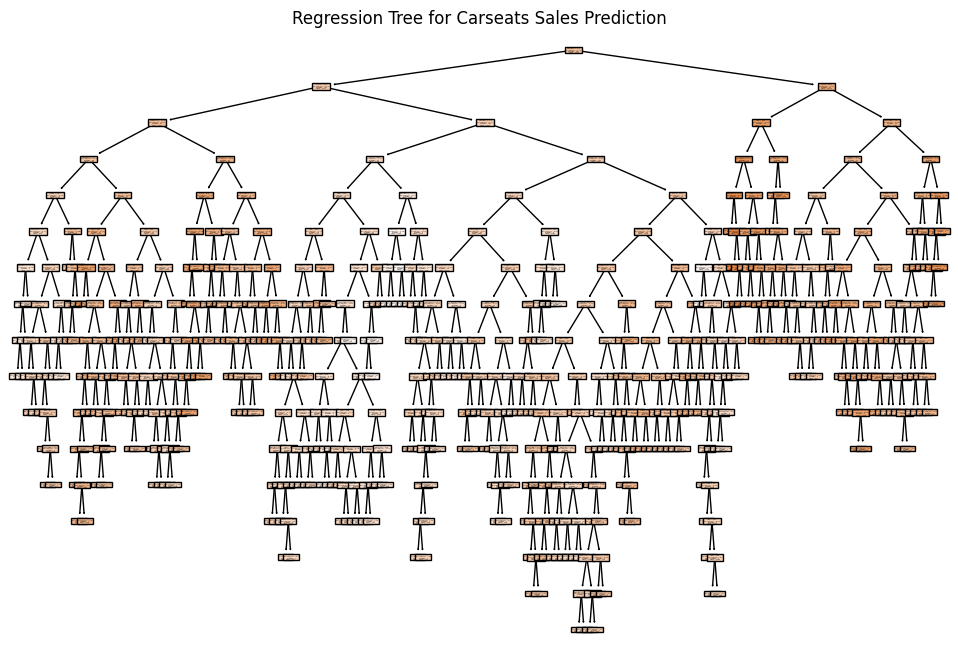

In [ ]:
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor, plot_tree

reg_tree = DecisionTreeRegressor(random_state=9);
reg_tree.fit(X_train, y_train);

plt.figure(figsize=(12, 8))
plot_tree(reg_tree, feature_names=X.columns, filled=True)
plt.title('Regression Tree for Carseats Sales Prediction')
plt.show()

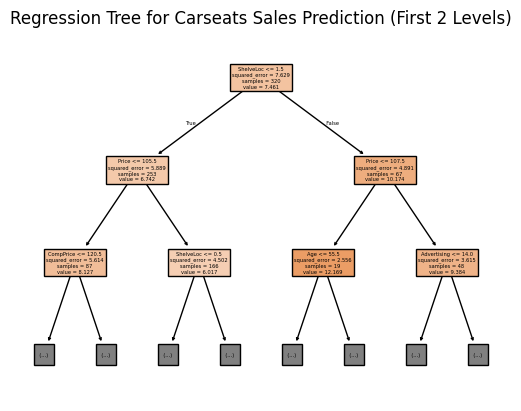

In [ ]:
plot_tree(reg_tree, feature_names=X.columns, filled=True, max_depth=2)
plt.title('Regression Tree for Carseats Sales Prediction (First 2 Levels)')
plt.show()


In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = reg_tree.predict(X_test)

test_mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {test_mse}')


Test MSE: 5.162377500000001


c)

In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': range(1, 11)}  # Testing depths from 1 to 10

# Initialize the Decision Tree Regressor
tree = DecisionTreeRegressor()

# Set up GridSearchCV
grid_search = GridSearchCV(tree, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_depth = grid_search.best_params_['max_depth']
print(f'Optimal tree depth: {best_depth}')

# Fit a tree with the optimal depth
optimal_tree = DecisionTreeRegressor(max_depth=best_depth)
optimal_tree.fit(X_train, y_train)

# Make predictions and calculate test MSE
y_pred_optimal = optimal_tree.predict(X_test)
test_mse_optimal = mean_squared_error(y_test, y_pred_optimal)

print(f'Test MSE with optimal depth: {test_mse_optimal}')


Optimal tree depth: 5
Test MSE with optimal depth: 5.354536285003203


The test MSE with a pruned tree is lower (since optimal depth is 5), so pruning indeed reduces overfitting

d)

In [ ]:
from sklearn.ensemble import BaggingRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

bagging_regressor = BaggingRegressor(estimator=DecisionTreeRegressor(), n_estimators=100, random_state=9)

bagging_regressor.fit(X_train, y_train)

# Make predictions and calculate test MSE
y_pred_bagging = bagging_regressor.predict(X_test)
test_mse_bagging = mean_squared_error(y_test, y_pred_bagging)

print(f'Test MSE with Bagging: {test_mse_bagging}')


Test MSE with Bagging: 2.610558273875001


e)

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
rf_model = RandomForestRegressor(n_estimators=100, random_state=9)

rf_model.fit(X_train, y_train)

# Make predictions and calculate test MSE
y_pred_rf = rf_model.predict(X_test)
test_mse_rf = mean_squared_error(y_test, y_pred_rf)

print(f'Test MSE with Random Forest: {test_mse_rf}')

Test MSE with Random Forest: 2.6115184406250003


In [ ]:
import numpy as np
feature_importances = rf_model.feature_importances_

# Sort and display feature importances
sorted_idx = np.argsort(feature_importances)[::-1]
for idx in sorted_idx:
    print(f'Feature: {X.columns[idx]}, Importance: {feature_importances[idx]}')

Feature: ShelveLoc, Importance: 0.3191531166204812
Feature: Price, Importance: 0.28301462832221047
Feature: CompPrice, Importance: 0.10551402993691564
Feature: Age, Importance: 0.0893058473206924
Feature: Advertising, Importance: 0.06996838726107438
Feature: Income, Importance: 0.05721543614110601
Feature: Population, Importance: 0.036443743262428815
Feature: Education, Importance: 0.03010265600340082
Feature: Urban, Importance: 0.0054546390896977465
Feature: US, Importance: 0.0038275160419926424


We can see that product placement (ShelveLoc) and pricing are the most critical factors influencing sales, whereas demographic and regional variables contribute less

In [ ]:
# Test different values of max_features
for m in [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]:
    rf_model = RandomForestRegressor(n_estimators=100, max_features=m, random_state=9)
    rf_model.fit(X_train, y_train)
    y_pred_rf = rf_model.predict(X_test)
    test_mse_rf = mean_squared_error(y_test, y_pred_rf)
    print(f'Test MSE with max_features={m}: {test_mse_rf}')



Test MSE with max_features=1: 4.6264909665000005
Test MSE with max_features=2: 3.1874044219999993
Test MSE with max_features=3: 2.8943829750000005
Test MSE with max_features=4: 2.6914295335
Test MSE with max_features=5: 2.7091447426249995
Test MSE with max_features=6: 2.586583191125
Test MSE with max_features=7: 2.4533296672499993
Test MSE with max_features=8: 2.528435448874999
Test MSE with max_features=9: 2.6670881603750005
Test MSE with max_features=10: 2.6115184406250003


As the number of variables (m) considered at each split increases, the error rate initially decreases due to reduced bias but then increases because of rising variance.

When fewer variables are considered at each split, each tree in the random forest uses a smaller portion of the information available. This reduces overfitting, helping with variance reduction, but may result in underfitting.

With a very low m, the error rate tends to be higher because of high bias, meaning the model may miss important feature interactions.

As the number of features considered at each split increases, each tree is able to capture more of the complexity of the data. However, when m is too large (close to the total number of features), the trees become highly correlated. This increases the likelihood of overfitting since the model can fit noise in the data.

Here the error rate decreases initially but starts to increase after a certain point due to overfitting. At high values of max_features, the trees are too similar, which reduces the ensemble's ability to generalize to new data.

There is a sweet spot where the m value balances the bias-variance trade-off. In this case max_features m=7 seems to provide the lowest MSE, indicating the best balance between bias and variance.

f)

In [ ]:
import xgboost as xgb
from sklearn.metrics import mean_squared_error

# Initialize the XGBoost regressor with specified parameters
xgb_model = xgb.XGBRegressor(max_depth=3, n_estimators=1000)

# Fit the model to the training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Calculate the Test MSE
mse = mean_squared_error(y_test, y_pred)
print(f'Test MSE: {mse}')


Test MSE: 1.7424203755271044
